In [417]:
#pip install shap

In [418]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [419]:
df = pd.read_csv('/content/house_data.csv')
df.shape

(5000, 16)

There are 5000 observations and 16 variables in our dataset. Each observation correspond to a house. Now, let's see the data.

In [420]:
df.head(5)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


In [421]:
# Count the number of NA's in each column
df.isna().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

In [422]:
# Now we are check the type of variables of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   object 
 4   latitude          5000 non-null   object 
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        4975 non-null   float64
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(4), int64(4), object(8)
memory 

In [423]:
def IdentifyKeyWord(x, word):
    if word in x.lower():
        return 1
    else:
        return 0

# Kitchen Features
df['KF_Dishwasher'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'dishwasher'))
df['KF_GarbageDisposal'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'garbage disposal'))
df['KF_Refrigerator'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'refrigerator'))
df['KF_DoubleSink'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'double sink'))
df['KF_Microwave'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'microwave'))
df['KF_Oven'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'oven'))
df['KF_Compactor'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'compactor'))
df['KF_Freezer'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'freezer'))
df['KF_ElectricRange'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'electric range'))
df['KF_Island'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'island'))
df['KF_GasRange'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'gas range'))
df['KF_Countertops'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'countertops'))
df['KF_Desk'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'desk'))
df['KF_Granite'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'granite'))
df['KF_Concrete'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'concrete'))
df['KF_WaterPurifier'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'water purifier'))
df['KF_Quartz'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'quartz'))
df['KF_Pantry'] = df.kitchen_features.apply(lambda x: IdentifyKeyWord(x, 'pantry'))

In [424]:
df[['KF_Dishwasher','KF_GarbageDisposal','KF_Refrigerator','KF_DoubleSink','KF_Microwave','KF_Oven','KF_Compactor',
    'KF_Freezer','KF_ElectricRange','KF_Island','KF_GasRange','KF_Countertops','KF_Desk','KF_Granite','KF_Concrete',
    'KF_WaterPurifier','KF_Quartz','KF_Pantry']].sum()

KF_Dishwasher         4857
KF_GarbageDisposal    4520
KF_Refrigerator       4234
KF_DoubleSink         1164
KF_Microwave          3625
KF_Oven               3977
KF_Compactor           432
KF_Freezer             395
KF_ElectricRange       401
KF_Island             1252
KF_GasRange           1307
KF_Countertops        1482
KF_Desk                327
KF_Granite            1114
KF_Concrete             28
KF_WaterPurifier       168
KF_Quartz              136
KF_Pantry             1461
dtype: int64

In [425]:
# Floor covering
df['FC_Stone'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'natural stone'))
df['FC_Ceramic'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'ceramic tile'))
df['FC_Laminate'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'laminate'))
df['FC_Wood'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'wood'))
df['FC_Carpet'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'carpet'))
df['FC_Concrete'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'concrete'))
df['FC_MexicanTile'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'mexican tile'))
df['FC_Other'] = df.floor_covering.apply(lambda x: IdentifyKeyWord(x, 'other'))

In [426]:
df[['FC_Stone','FC_Ceramic','FC_Laminate','FC_Wood','FC_Carpet','FC_Concrete','FC_MexicanTile','FC_Other']].sum()

FC_Stone          1499
FC_Ceramic        2527
FC_Laminate         86
FC_Wood           1248
FC_Carpet         3509
FC_Concrete        756
FC_MexicanTile     660
FC_Other           496
dtype: int64

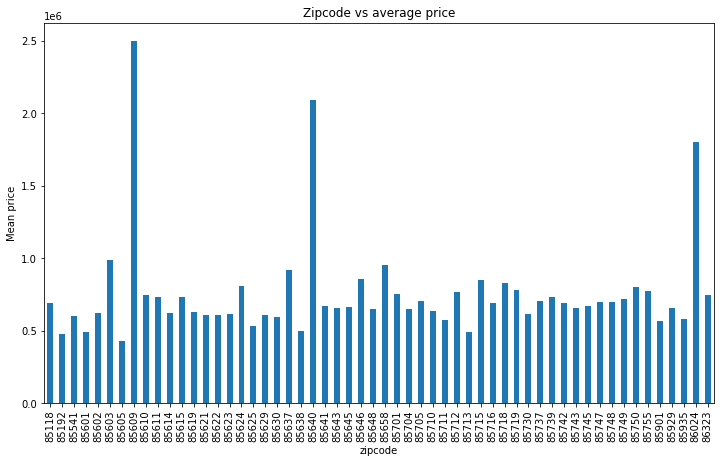

In [427]:
dfg = df.groupby(['zipcode'])['sold_price'].mean()
dfg.plot(kind='bar', title='Zipcode vs average price', ylabel='Mean price',
         xlabel='zipcode', figsize=(12, 7))

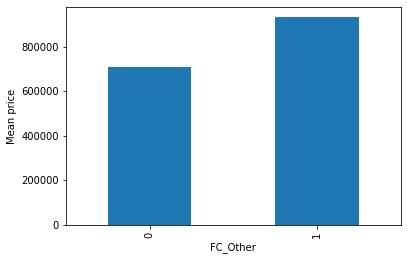

In [428]:
dfg = df.groupby(['FC_Stone'])['sold_price'].mean()
dfg.plot(kind='bar', ylabel='Mean price',
         xlabel='FC_Other')#, figsize=(12, 7))

In [429]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'KF_Dishwasher', 'KF_GarbageDisposal', 'KF_Refrigerator',
       'KF_DoubleSink', 'KF_Microwave', 'KF_Oven', 'KF_Compactor',
       'KF_Freezer', 'KF_ElectricRange', 'KF_Island', 'KF_GasRange',
       'KF_Countertops', 'KF_Desk', 'KF_Granite', 'KF_Concrete',
       'KF_WaterPurifier', 'KF_Quartz', 'KF_Pantry', 'FC_Stone', 'FC_Ceramic',
       'FC_Laminate', 'FC_Wood', 'FC_Carpet', 'FC_Concrete', 'FC_MexicanTile',
       'FC_Other'],
      dtype='object')

In [430]:
def trans_lat(x):
  y = x.replace(',','').replace('.','')
  return (y[:2] + '.' + y[2:])
def trans_lon(x):
  y = x.replace(',','').replace('.','')
  return (y[:4] + '.' + y[4:])

df['latitude'] = df.latitude.apply(trans_lat).astype(float)
df['longitude'] = df.longitude.apply(trans_lon).astype(float)

In [431]:
# Filling missing values
df['HOA'] = df.HOA.str.replace('None','55') #0
df['HOA'] = df.HOA.str.replace(',','.')
df['HOA'] = df.HOA.astype(float)
#df['HOA'] = df.HOA.astype(int)
df['bathrooms'] = df.bathrooms.str.replace('None','4')
df['bathrooms'] = df.bathrooms.astype(float).round()
df['sqrt_ft'] = df.sqrt_ft.str.replace('None','3047') #'3512'
df['sqrt_ft'] = df.sqrt_ft.astype(float)
df['garage'] = df.garage.str.replace('None','3')
df['garage'] = df.garage.astype(float).round()
df['lot_acres'] = df.lot_acres.fillna(1)
df['fireplaces'] = df.fireplaces.fillna(2)
df['year_built'] = df.year_built.replace(0,2019)

In [432]:
df.drop(['MLS','floor_covering','kitchen_features'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sold_price          5000 non-null   float64
 1   zipcode             5000 non-null   int64  
 2   longitude           5000 non-null   float64
 3   latitude            5000 non-null   float64
 4   lot_acres           5000 non-null   float64
 5   taxes               5000 non-null   float64
 6   year_built          5000 non-null   int64  
 7   bedrooms            5000 non-null   int64  
 8   bathrooms           5000 non-null   float64
 9   sqrt_ft             5000 non-null   float64
 10  garage              5000 non-null   float64
 11  fireplaces          5000 non-null   float64
 12  HOA                 5000 non-null   float64
 13  KF_Dishwasher       5000 non-null   int64  
 14  KF_GarbageDisposal  5000 non-null   int64  
 15  KF_Refrigerator     5000 non-null   int64  
 16  KF_Dou

In [433]:
fig = px.scatter_mapbox(df,lat = 'latitude', lon = 'longitude', color = 'sold_price',
                        center=dict(lon=-110.9, lat=32.3),
                       zoom = 9, mapbox_style = 'open-street-map')
fig

In [434]:
df['latitude2'] = df['latitude']**2
df['longitude2'] = df['longitude']**2
X = df.to_numpy()
y = X[:,0]
X = X[:,1:]

In [435]:
class MultiLinearRegression():

  def fit(self, X, y):
    self.W = np.linalg.solve(X.T@X, X.T@y)

  def predict(self, X):

    return np.matmul(X, self.W)

In [436]:
lr_mul = MultiLinearRegression()

In [437]:
lr_mul.fit(X,y)

In [438]:
y_hat = lr_mul.predict(X)

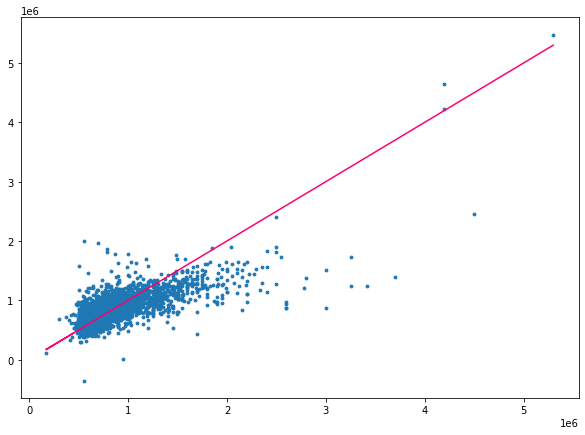

In [439]:
plt.figure(figsize=(10,7))
plt.scatter(y, y_hat, s=8)
plt.plot(y,y, color = '#FF0070')

In [440]:
def R2(Y, Y_hat):
  return(1-(np.sum((Y-Y_hat)**2)/np.sum((Y-np.mean(Y))**2)))

In [441]:
R2(y, y_hat)

0.5614112573942174

In [442]:
class KNNRegressor:

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)
    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis = 1)
      idxt = np.argsort(dist2)[:K]
      gamma_K = np.exp(-dist2[idxt]) / np.exp(-dist2[idxt]).sum()
      y_hat[i] = gamma_K.dot(self.y[idxt])

    return y_hat

In [443]:
knn_reg = KNNRegressor()

In [444]:
df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'HOA', 'KF_Dishwasher', 'KF_GarbageDisposal',
       'KF_Refrigerator', 'KF_DoubleSink', 'KF_Microwave', 'KF_Oven',
       'KF_Compactor', 'KF_Freezer', 'KF_ElectricRange', 'KF_Island',
       'KF_GasRange', 'KF_Countertops', 'KF_Desk', 'KF_Granite', 'KF_Concrete',
       'KF_WaterPurifier', 'KF_Quartz', 'KF_Pantry', 'FC_Stone', 'FC_Ceramic',
       'FC_Laminate', 'FC_Wood', 'FC_Carpet', 'FC_Concrete', 'FC_MexicanTile',
       'FC_Other', 'latitude2', 'longitude2'],
      dtype='object')

In [445]:
df[['sold_price', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'HOA']].corr()

,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
sold_price,1.000000,-0.036819,0.035206,0.332329,0.023326,0.098461,0.115932,0.325982,0.525068,0.100672,0.383819,0.303697
longitude,-0.036819,1.000000,-0.251697,0.127891,-0.000959,-0.109066,0.058279,0.014856,0.064036,-0.041764,0.046265,-0.095959
latitude,0.035206,-0.251697,1.000000,-0.199936,0.000823,0.172578,-0.091935,-0.081501,-0.096670,0.060698,-0.087933,0.168184
lot_acres,0.332329,0.127891,-0.199936,1.000000,-0.000567,-0.066292,0.069328,0.054924,0.103044,-0.052492,0.086336,-0.040649
taxes,0.023326,-0.000959,0.000823,-0.000567,1.000000,-0.004243,0.005259,0.008971,0.037699,0.005621,0.022540,0.021543
year_built,0.098461,-0.109066,0.172578,-0.066292,-0.004243,1.000000,-0.184503,-0.049991,-0.058147,0.315738,-0.126997,0.252893
bedrooms,0.115932,0.058279,-0.091935,0.069328,0.005259,-0.184503,1.000000,0.686397,0.546838,0.051076,0.144822,-0.153160
bathrooms,0.325982,0.014856,-0.081501,0.054924,0.008971,-0.049991,0.686397,1.000000,0.660065,0.108916,0.225641,0.041235
sqrt_ft,0.525068,0.064036,-0.096670,0.103044,0.037699,-0.058147,0.546838,0.660065,1.000000,0.180172,0.404005,0.039281
garage,0.100672,-0.041764,0.060698,-0.052492,0.005621,0.315738,0.051076,0.108916,0.180172,1.000000,0.064234,0.014911


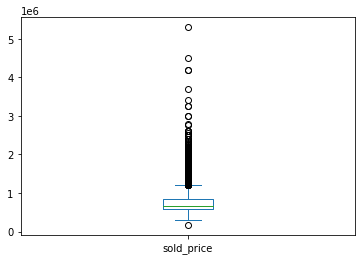

In [446]:
df.sold_price.plot.box()

### Treating/Removing **Outliers**

In [447]:
# Removing outliers from sold price
print(df.sold_price.quantile(0.05))
print(df.sold_price.quantile(0.98))

535000.0
1700299.999999993


(4881, 41)

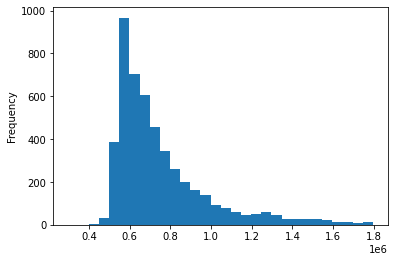

In [448]:
#df['sold_price'] = np.where(df['sold_price'] > 1700000, 1700000, df['sold_price'])
df = df[df['sqrt_ft'] > 2000]
df = df[df['sold_price'] < 1800000]
df.sold_price.plot.hist(bins = 30)
df.shape

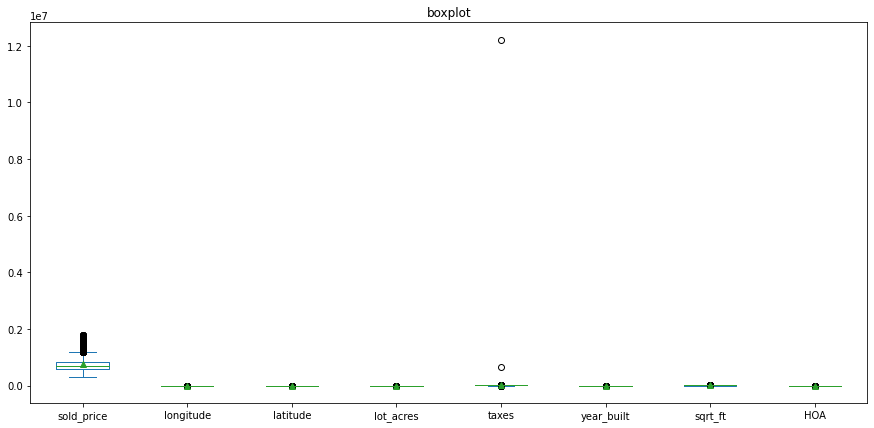

In [449]:
# Removing outliers from the rest of the data
ax = df[['sold_price','longitude','latitude','lot_acres','taxes','year_built','sqrt_ft','HOA']].plot(kind='box', figsize = (15,7),
                                                                                                     title='boxplot', showmeans=True)
plt.show()

In [450]:
df[df['taxes'] > 500000]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,FC_Stone,FC_Ceramic,FC_Laminate,FC_Wood,FC_Carpet,FC_Concrete,FC_MexicanTile,FC_Other,latitude2,longitude2
715,1040000.0,85718,-110.909653,32.301099,1.43,12215075.0,1987,4,4.0,5729.0,...,1,1,0,0,0,0,0,0,1043.360997,12300.951129
1135,885000.0,85718,-110.924210,32.309002,1.20,668059.0,2003,4,3.0,3650.0,...,1,0,0,0,1,0,0,1,1043.871610,12304.180364


In [451]:
df = df[df['taxes'] < 500000]

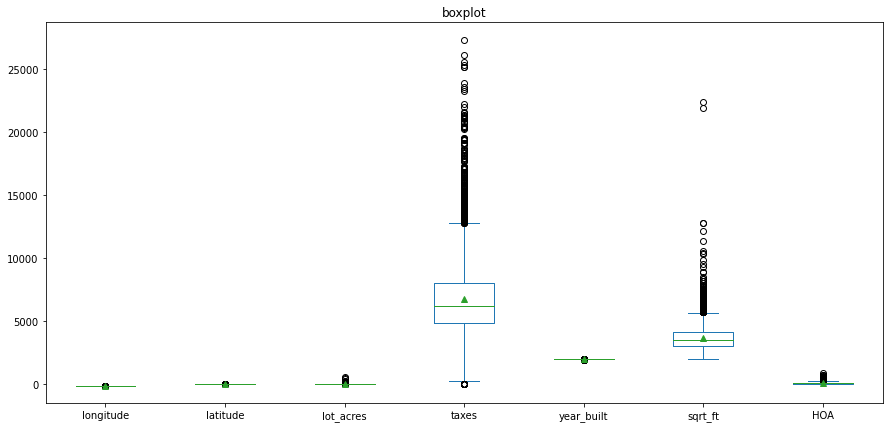

In [452]:
ax = df[['longitude','latitude','lot_acres','taxes','year_built','sqrt_ft','HOA']].plot(kind='box', figsize = (15,7),
                                                                                                    title='boxplot', showmeans=True)
plt.show()

40.42760000000002
0.98


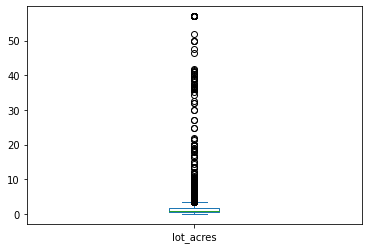

In [453]:
print(df.lot_acres.quantile(0.99))
print(df.lot_acres.quantile(0.5))
df['lot_acres'] = np.where(df['lot_acres'] > 57, 57, df['lot_acres'])
df.lot_acres.plot.box()

32.4589508
32.318308
32.2256194


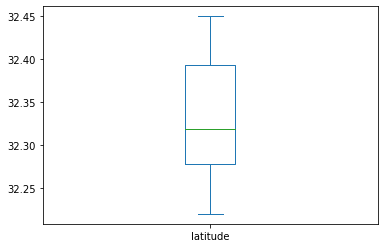

In [454]:
print(df.latitude.quantile(0.9))
print(df.latitude.quantile(0.5))
print(df.latitude.quantile(0.1))
df['latitude'] = np.where(df['latitude'] > 32.45, 32.45, df['latitude'])
df['latitude'] = np.where(df['latitude'] < 32.22, 32.22, df['latitude'])
df.latitude.plot.box()

-110.76590859999999
-110.92346
-111.051299


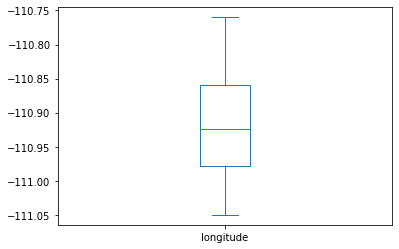

In [455]:
print(df.longitude.quantile(0.9))
print(df.longitude.quantile(0.5))
print(df.longitude.quantile(0.1))
df['longitude'] = np.where(df['longitude'] > -110.76, -110.76, df['longitude'])
df['longitude'] = np.where(df['longitude'] < -111.05, -111.05, df['longitude'])
df.longitude.plot.box()

180.0
55.0


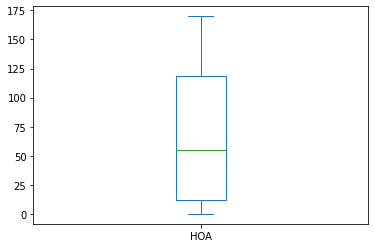

In [456]:
print(df.HOA.quantile(0.9))
print(df.HOA.quantile(0.5))
df['HOA'] = np.where(df['HOA'] > 170, 170, df['HOA'])
df.HOA.plot.box()

1971.0
1999.0


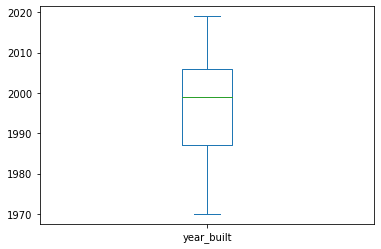

In [457]:
print(df.year_built.quantile(0.1))
print(df.year_built.quantile(0.5))
df['year_built'] = np.where(df['year_built'] < 1970, 1970, df['year_built'])
df.year_built.plot.box()

5489.0
3495.0


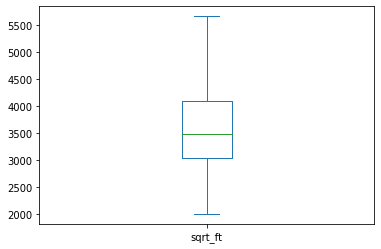

In [458]:
print(df.sqrt_ft.quantile(0.95))
print(df.sqrt_ft.quantile(0.5))
df['sqrt_ft'] = np.where(df['sqrt_ft'] > 5664, 5664, df['sqrt_ft'])#4592
df.sqrt_ft.plot.box()

10577.418
6218.85


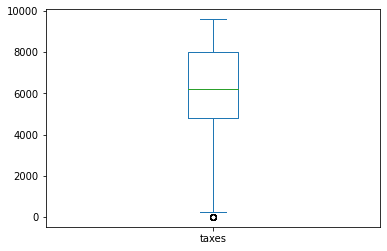

In [459]:
print(df.taxes.quantile(0.9))
print(df.taxes.quantile(0.5))
df['taxes'] = np.where(df['taxes'] > 9595, 9595, df['taxes'])
df.taxes.plot.box()

In [460]:
df[['sold_price', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'HOA']].corr()

,sold_price,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
sold_price,1.000000,-0.047089,0.109379,0.033746,0.450349,0.165064,0.102065,0.322490,0.571767,0.139248,0.381971,0.286478
longitude,-0.047089,1.000000,-0.479889,0.140548,-0.031265,-0.191390,0.062844,0.002420,0.092126,-0.029759,0.055814,-0.038498
latitude,0.109379,-0.479889,1.000000,-0.217506,0.066621,0.364060,-0.148514,-0.065164,-0.096873,0.120379,-0.105247,0.299435
lot_acres,0.033746,0.140548,-0.217506,1.000000,0.048010,-0.080496,0.150055,0.157388,0.110227,-0.004263,0.107960,-0.117665
taxes,0.450349,-0.031265,0.066621,0.048010,1.000000,0.002076,0.189044,0.273648,0.556803,0.168283,0.395058,0.132247
year_built,0.165064,-0.191390,0.364060,-0.080496,0.002076,1.000000,-0.152030,-0.017552,-0.048153,0.294821,-0.147990,0.297720
bedrooms,0.102065,0.062844,-0.148514,0.150055,0.189044,-0.152030,1.000000,0.681992,0.393022,0.039942,0.125433,-0.166970
bathrooms,0.322490,0.002420,-0.065164,0.157388,0.273648,-0.017552,0.681992,1.000000,0.515949,0.098239,0.196873,0.019695
sqrt_ft,0.571767,0.092126,-0.096873,0.110227,0.556803,-0.048153,0.393022,0.515949,1.000000,0.216515,0.415446,0.006236
garage,0.139248,-0.029759,0.120379,-0.004263,0.168283,0.294821,0.039942,0.098239,0.216515,1.000000,0.053782,0.032085


In [461]:
vars = ['sold_price','garage','sqrt_ft','longitude','latitude','bedrooms','fireplaces','taxes',
        'HOA','year_built','lot_acres','FC_Ceramic'] #,,'FC_Wood''KF_Refrigerator'
        #'KF_ElectricRange','bathrooms','zipcode','FC_Stone','KF_Compactor','KF_Freezer'
df = df[vars]

In [462]:
## Split database
i = np.arange(len(df))
np.random.shuffle(i)
train = df.iloc[i[:int(len(df)*0.75)]]
test = df.iloc[i[int(len(df)*0.75):int(len(df)*0.85)]]
validation = df.iloc[i[int(len(df)*0.85):]]

In [463]:
def normalize_function(data):
   min = np.amin(data,axis=0)
   max = np.amax(data,axis=0)
   return (data - min)/(max-min)

In [464]:
print(train.shape)
print(test.shape)
print(validation.shape)

(3659, 12)
(488, 12)
(732, 12)


In [465]:
# Transform all datasets into arrays
X_train = train.to_numpy()
y_train = X_train[:,0]
X_train = X_train[:,1:]
X_test = test.to_numpy()
y_test = X_test[:,0]
X_test = X_test[:,1:]
X_validation = validation.to_numpy()
y_validation = X_validation[:,0]
X_validation = X_validation[:,1:]
X_train = normalize_function(X_train)
X_test = normalize_function(X_test)
X_validation = normalize_function(X_validation)

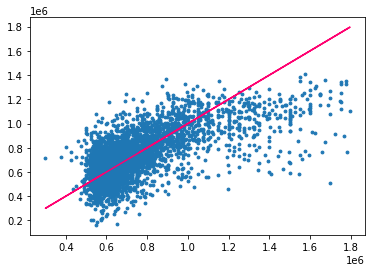

In [466]:
lr_mul.fit(X_train,y_train)
y_hat = lr_mul.predict(X_train)
#plt.figure(figsize=(10,7))
plt.scatter(y_train, y_hat, s=8)
plt.plot(y_train,y_train, color = '#FF0070')

**Model 1: Simple Linear Regression**

In [467]:
R2(y_train, y_hat)

0.385863109907968

In [468]:
y_hat = lr_mul.predict(X_test)
R2(y_test, y_hat)

-0.9856062905442071

**Model 2: K-Nearest Neightbors**

In [469]:
def performance(XTrain, yTrain, XTest, yTest, K):
  knn_reg.fit(XTrain,yTrain)
  yTrain_hat = knn_reg.predict(XTrain, K)
  yTest_hat = knn_reg.predict(XTest, K)
  return np.array([R2(yTrain, yTrain_hat), R2(yTest, yTest_hat)])

In [470]:
K_grid = np.array([3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
R2_results = []

for k in K_grid:
  R2_results.append( performance(X_train, y_train, X_test, y_test, k) )

df_results = pd.DataFrame({'Neighbors': K_grid,
                           'Train': np.array(R2_results)[:,0],
                           'Test': np.array(R2_results)[:,1]})
df_results

,Neighbors,Train,Test
0,3,0.793363,0.561310
1,4,0.762019,0.615650
2,5,0.741470,0.614244
3,6,0.723838,0.631726
4,7,0.710675,0.631540
5,8,0.697354,0.638335
6,9,0.689428,0.633918
7,10,0.683050,0.633170
8,11,0.676203,0.625831
9,12,0.669323,0.622280


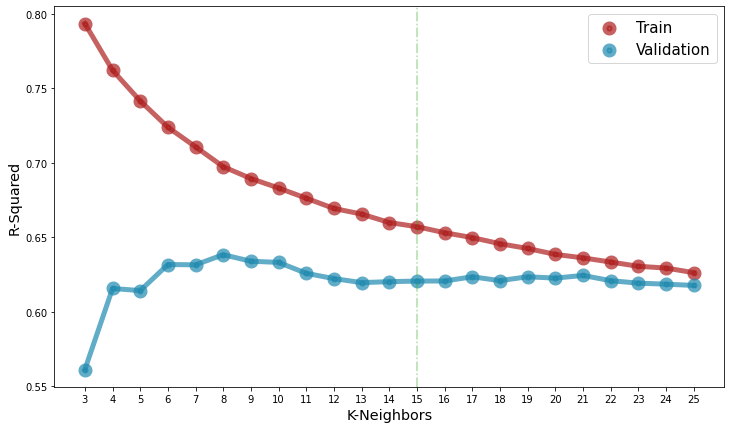

In [471]:
plt.figure(figsize = (12,7))
plt.axvline(x=15, alpha = 0.4, color = '#36AF1E', linestyle='dashdot')
plt.plot(df_results.Neighbors, df_results.Train, color ='#AF1E1E', linewidth=5, alpha = 0.7)
plt.plot(df_results.Neighbors, df_results.Test, color = '#1E89AF', linewidth=5, alpha = 0.7)
plt.scatter(df_results.Neighbors, df_results.Train, color ='#AF1E1E', label = 'Train', linewidths = 8, alpha = 0.7)
plt.scatter(df_results.Neighbors, df_results.Test, color = '#1E89AF', label = 'Validation', linewidths = 8, alpha = 0.7)
plt.xlabel('K-Neighbors', size = 'x-large')
plt.ylabel('R-Squared', size = 'x-large')
plt.legend(fontsize=15)
plt.xticks(np.arange(3, 26, 1))
plt.show()

In [474]:
yvalidation_hat = knn_reg.predict(X_validation, 15)
R2(y_validation, yvalidation_hat)

0.6664056024818594

In [475]:
f = lambda x: knn_reg.predict(x, 9)
med = np.median(X_train, axis = 0).reshape(1, X_train.shape[1])

explainer = shap.Explainer(f, med, 
                           feature_names = ['garage','sqrt_ft','longitude','latitude','bedrooms','fireplaces','taxes','HOA','year_built','lot_acres','FC_Ceramic'])
shap_values = explainer(X_validation)

Permutation explainer: 733it [03:07,  3.70it/s]


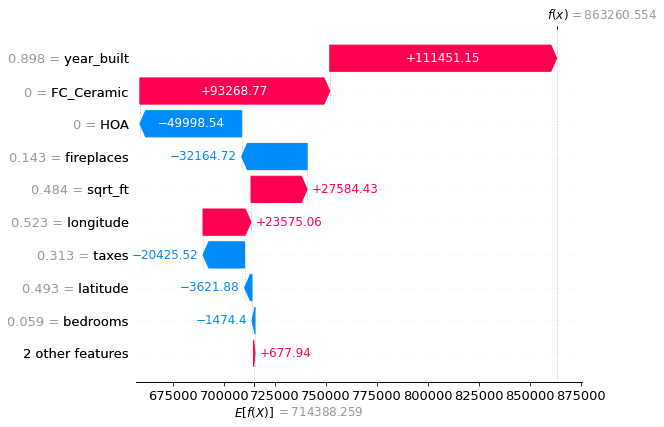

In [476]:
shap.plots.waterfall(shap_values[10])

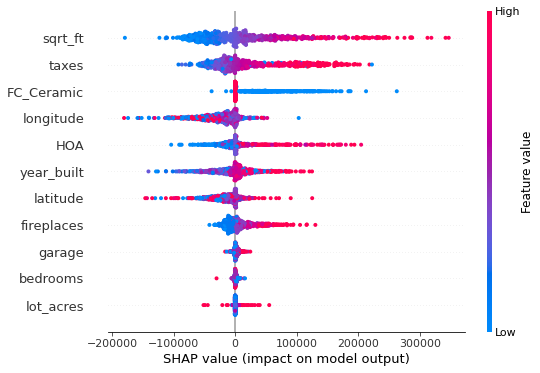

In [477]:
shap.plots.beeswarm(shap_values, max_display=12)

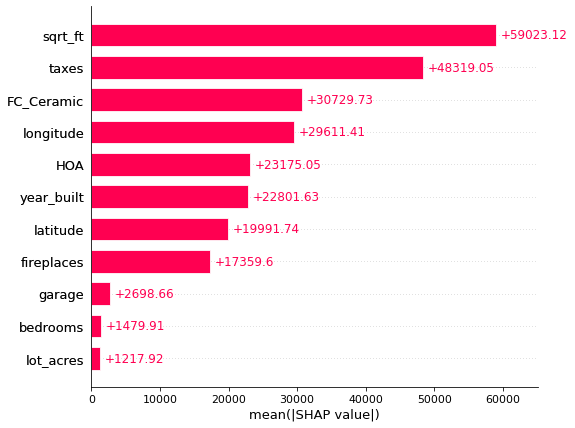

In [478]:
shap.plots.bar(shap_values, max_display=12)